# This exploratory data analysis is based on the products data provided by Amazon

In [748]:
#importing the libraries that will be used in this project
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from termcolor import colored
import wordcloud as wc

In [749]:
#reading the data into a dataframe
df = pd.read_csv("../sample.csv")
#Intial shape of the dataframe
print("Initial shape of the dataframe is : ", df.shape , "\n")
#Printing the first 2 rows of the datframe
print("The first 2 rows of the dataframe are-", "\n")
df.head(2)

Initial shape of the dataframe is :  (7249, 31) 

The first 2 rows of the dataframe are- 



,id,prices.amountMax,prices.amountMin,prices.availability,prices.condition,prices.currency,prices.dateSeen,prices.isSale,prices.merchant,prices.shipping,...,name,primaryCategories,sourceURLs,upc,weight,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,AVphzgbJLJeJML43fA0o,104.99,104.99,Yes,New,USD,"2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017...",False,Bestbuy.com,NaN,...,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,Electronics,https://www.amazon.com/Sanus-VLF410B1-10-Inch-...,7.94E+11,32.8 pounds,NaN,NaN,NaN,NaN,NaN
1,AVpgMuGwLJeJML43KY_c,69.00,64.99,In Stock,New,USD,2017-12-14T06:00:00Z,True,Walmart.com,Expedited,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds,NaN,NaN,NaN,NaN,NaN


As can be seen from the datframe, it has several "unnamed" columns having mostly null values. 
Let's check the complete data for null values.

In [750]:
df.isnull().sum().sort_values(ascending = False).to_frame().T

,Unnamed: 30,Unnamed: 28,Unnamed: 29,Unnamed: 27,Unnamed: 26,ean,manufacturer,prices.shipping,weight,upc,...,asins,prices.sourceURLs,prices.merchant,prices.isSale,prices.dateSeen,prices.currency,prices.condition,prices.availability,prices.amountMin,dateUpdated
0,7243,7243,7237,7231,7210,5706,4014,2972,0,0,...,0,0,0,0,0,0,0,0,0,0


It is confirmed that all the **"Unnamed"** columns have mostly null values. Several other columns also have 
significantly high amount of missing values. But we will deal with those columns after understanding a bit more
about the data. 
       For now, let's delete the **"Unnamed"** columns.

In [751]:
df.drop([col for col in df.columns if "Unnamed" in col], axis = 1, inplace = True)
df.head(2)

,id,prices.amountMax,prices.amountMin,prices.availability,prices.condition,prices.currency,prices.dateSeen,prices.isSale,prices.merchant,prices.shipping,...,ean,imageURLs,keys,manufacturer,manufacturerNumber,name,primaryCategories,sourceURLs,upc,weight
0,AVphzgbJLJeJML43fA0o,104.99,104.99,Yes,New,USD,"2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017...",False,Bestbuy.com,NaN,...,NaN,https://images-na.ssl-images-amazon.com/images...,sanusvlf410b110inchsuperslimfullmotionmountfor...,NaN,VLF410B1,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,Electronics,https://www.amazon.com/Sanus-VLF410B1-10-Inch-...,7.94E+11,32.8 pounds
1,AVpgMuGwLJeJML43KY_c,69.00,64.99,In Stock,New,USD,2017-12-14T06:00:00Z,True,Walmart.com,Expedited,...,NaN,https://images-na.ssl-images-amazon.com/images...,boytone2500w21chhometheatersystemblackdiamond/...,Boytone,BT-210F,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds




Here is a list of the remaining columns -


In [752]:
df.columns

Index(['id', 'prices.amountMax', 'prices.amountMin', 'prices.availability',
       'prices.condition', 'prices.currency', 'prices.dateSeen',
       'prices.isSale', 'prices.merchant', 'prices.shipping',
       'prices.sourceURLs', 'asins', 'brand', 'categories', 'dateAdded',
       'dateUpdated', 'ean', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'primaryCategories', 'sourceURLs', 'upc',
       'weight'],
      dtype='object')



From the list of columns, the following issues can be noticed - 

   * The list of columns shows that several columns are named incorrectly and have **"prices."** as prefix.
   * The columns **sourceURLs** appears twice. In this analysis we won't be using the **sourceURLs** or the **imageURLs**. So, these columns are dropped.

Let's resolve these.


In [753]:
df.columns = df.columns.str.replace("prices.", "", regex = True)
df.drop(["sourceURLs", "imageURLs"], axis = 1, inplace = True)
df.columns
    

Index(['id', 'amountMax', 'amountMin', 'availability', 'condition', 'currency',
       'dateSeen', 'isSale', 'merchant', 'shipping', 'asins', 'brand',
       'categories', 'dateAdded', 'dateUpdated', 'ean', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'primaryCategories', 'upc', 'weight'],
      dtype='object')

The column list looks good. 
Most of the column names are self-explanatory. The **"not so simple"** columns are - 
   * **availability -** In stock or not. 
   * **condition -** New, used etc
   * **asins -** Amazon Standard Identification Number
   * **ean -** European Article Number
   * **upc -** Universal Product Code




Let us have a look at the column data types and non-null values:



In [754]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7249 entries, 0 to 7248
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  7249 non-null   object 
 1   amountMax           7249 non-null   float64
 2   amountMin           7249 non-null   float64
 3   availability        7249 non-null   object 
 4   condition           7249 non-null   object 
 5   currency            7249 non-null   object 
 6   dateSeen            7249 non-null   object 
 7   isSale              7249 non-null   bool   
 8   merchant            7249 non-null   object 
 9   shipping            4277 non-null   object 
 10  asins               7249 non-null   object 
 11  brand               7249 non-null   object 
 12  categories          7249 non-null   object 
 13  dateAdded           7249 non-null   object 
 14  dateUpdated         7249 non-null   object 
 15  ean                 1543 non-null   object 
 16  keys  



The information above tells us that -

   * Most columns have no missing values.
   * Columns **shipping**, **ean** and **manufacturer** have significant number of missing values.
   * The datatype of **dateAdded**, **dateSeen** and **dateUpdated** columns is "object" instead of "DateTime object"
   * The datatype of the **weight** column is "object" instead of "float".

The percentage of missing values are -



In [755]:
df[["shipping", "manufacturer", "ean"]].isnull().sum()*100/(df.shape[0])

shipping        40.998758
manufacturer    55.373155
ean             78.714305
dtype: float64


Let's explore the columns. 

**id** and **name** columns:

In [756]:
print("The number of unique product IDs is :" , df.id.nunique())
print("The number of unique product names is :" , df.name.nunique())


The number of unique product IDs is : 835
The number of unique product names is : 828


So, there are a total of 835 different product IDs and 828 different profuct names. So, some IDs must have same names.

The **id** and **name** of the rows where the **name** repeats are:


In [757]:
temp = df.groupby(["id", "name"])[["id", "name"]].count()
temp.columns = ["ID count", "name count"]
temp.reset_index(inplace = True)
temp1 = temp[temp.duplicated(subset = ["name"], keep = False)]
temp1.drop(["ID count", "name count"], axis = 1)

,id,name
20,AV0ox1E0vKc47QAVf8Pz,Yamaha - AVENTAGE 7.2-Ch. 4K Ultra HD A/V Home...
105,AV2ZpDBUvKc47QAVpH5Z,Pioneer - Elite 7.2-Ch. Hi-Res 4K Ultra HD HDR...
307,AVpfZaCp1cnluZ0-kDV9,"15.4 MacBook Pro with Touch Bar (Late 2016, Sp..."
333,AVpfiRcdilAPnD_xdfwQ,Panamax - 8-Outlet Power Conditioner/Surge Pro...
462,AVpgj4Cd1cnluZ0-3MKD,Panamax - 8-Outlet Power Conditioner/Surge Pro...
636,AVqVGTt2v8e3D1O-ldE7,SunBriteTV - Signature Series - 43 Class - LED...
637,AVqVGTt6U2_QcyX9Ozbx,SunBriteTV - Signature Series - 43 Class - LED...
644,AVqVGaCCU2_QcyX9Ozcf,"15.4 MacBook Pro with Touch Bar (Late 2016, Sp..."
658,AVqVHk9yU2_QcyX9Ozm8,House of Marley
681,AVqkHRDnv8e3D1O-leK1,House of Marley


Let's explore the **amountMax** and **amountMin** cloumns. But before that we need to make sure that all entries are in same currency. So, first the **currency** column must be checked.


In [758]:
df.currency.value_counts()

USD    7248
CAD       1
Name: currency, dtype: int64

So, only 1 entry is in **CAD**. Let's convert the **amountMax** and **amountMin** to **USD** wher it is in **CAD**. The exchange rate used is: 

   1 **CAD** = 0.77 **USD**.
After the conversion, the **currency** column will have only one value **USD** and hence it is dropped.

In [759]:
#converting CAD to USD
CAD_index = df.loc[df.currency == "CAD"].index
for i in CAD_index:
    df.amountMin = df.amountMin * 0.77
    df.amountMax = df.amountMax * 0.77
df.drop(["currency"], axis = 1, inplace = True)

The summary statistics of the **amountMax** and **amountMin** columns is:

In [760]:
temp = df[["amountMax", "amountMin"]]
temp.describe()

,amountMax,amountMin
count,7249.000000,7249.000000
mean,381.558569,357.251514
std,587.971528,523.988470
min,0.770000,0.770000
25%,61.592300,61.561500
50%,153.222300,146.292300
75%,381.142300,369.592300
max,5389.992300,4619.992300


In [761]:
temp.median()

amountMax    153.2223
amountMin    146.2923
dtype: float64

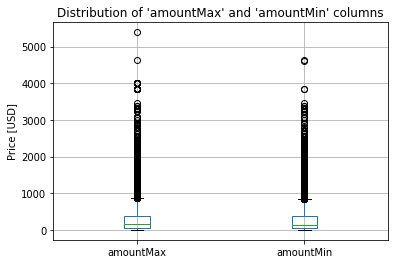

In [762]:
temp.boxplot()
plt.ylabel("Price [USD]")
plt.title("Distribution of 'amountMax' and 'amountMin' columns");

From the plot, it is evident that the data has many outliers which explain the huge standard deviations and the huge gap between the means and the medians.

Checking if in any row has equal values in these two columns:

In [763]:
x = df[df["amountMax"] == df["amountMin"]].shape[0]*100/df.shape[0]
print("The percentage of rows having equal amountMin and amountMax values is: ", round(x, 1))

The percentage of rows having equal amountMin and amountMax values is:  90.8


It's clear that approximately 90% of the rows have same values in those two columns.

Let's move on to the availability column.

In [764]:
temp = df.availability.value_counts().to_frame()
temp.columns = ["count"]
temp

,count
In Stock,3172
Yes,2136
yes,893
TRUE,663
Out Of Stock,115
Special Order,109
More on the Way,91
undefined,40
sold,22
No,4


As we can guess, the values "Yes", "yes" and "TRUE" are same as "In Stock" and the values "sold", "no" and "FALSE" are same as "Out Of Stock". Let's make the changes:

In [765]:
#Replacing values in columns with appropriate values
df["availability"].replace({"yes" : "In Stock", 
                            "Yes" : "In Stock", 
                            "TRUE" : "In Stock", 
                            "sold" : "Out Of Stock",
                            "No" : "Out Of Stock",
                            "FALSE" : "Out Of Stock",
                            }, inplace = True)

In [766]:
df.availability.value_counts()

In Stock           6864
Out Of Stock        142
Special Order       109
More on the Way      91
undefined            40
Retired               1
32 available          1
7 available           1
Name: availability, dtype: int64

Looks better.

   Some products are out of stock. The **"id"**, **"name"**, **"asins"**, **brand** and **"manufacturer"** of these products are:
    

In [767]:
Out_Of_Stock = df[df.availability =="Out Of Stock"][["id", "name", "manufacturer", "asins", "brand"]]
Out_Of_Stock.head()

,id,name,manufacturer,asins,brand
120,AVpfLsb-ilAPnD_xWtDE,Kenwood KFC-1653MRW 6.5 2-way Marine Speakers ...,Kenwood,B00U7RW0B8,Kenwood
188,AVpgF1BOilAPnD_xnTsK,iHome Rechargeable Splash Proof Stereo Bluetoo...,iHome,B00WBS31OQ,"Sdi Technologies, Inc."
203,AV1YFmcQglJLPUi8IGd1,Corsair CMSA8GX3M2A1066C7 Apple 8 GB Dual Chan...,NaN,B00505EZYW,Corsair
282,AVpiLlubilAPnD_xBoTa,House of Marley Smile Jamaica In-Ear Earbuds,House Of Marley,B00G3P9UMU,House of Marley
393,AVpfC6mu1cnluZ0-cszY,Russound - Acclaim 5 Series 5-1/4 2-Way Indoor...,Russound,"B003XM3MCA,B007WM3EIE,B007I57JMM",Russound


It is assumed that the above mentioned five attributes are sufficient to uniquely identify the product and can be used for restocking purposes.

Let's now checkout the **condition** column.

In [768]:
df.condition.value_counts()

New                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

Most products are new. The **"new"** and **"New other (see details)"** values can be replaced with **"New"**. Also all types of **refurbished** items can be given the same condition which is **"Refurbished"** and **"pre-owned"** is replaced with **"Used"**. The rows having very lengthy **condition** values are dropped.

In [769]:
df["condition"].replace({"new": "New", "New other (see details)" : "New", "pre-owned" : "Used", 
                         "refurbished" : "Refurbished", "Seller refurbished" : "Refurbished",
                        "Manufacturer refurbished" : "Refurbished"}, inplace = True)

#dropping rowns having lengthy "condition" values
for i in range(0, df.shape[0]):
    if len(df["condition"][i]) > 15:
        df.drop([i], inplace = True)
    else:
        pass


In [770]:
df.condition.value_counts()

New            7017
Used            146
Refurbished      83
Name: condition, dtype: int64

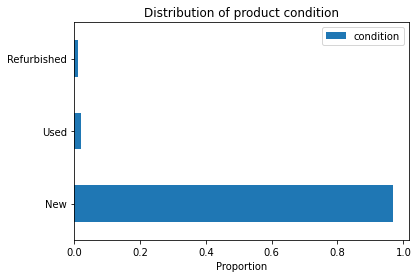

In [771]:
df.condition.value_counts(normalize = True).to_frame().plot(kind = "barh")
plt.xlabel("Proportion")
plt.title("Distribution of product condition");

In [772]:
df.columns

Index(['id', 'amountMax', 'amountMin', 'availability', 'condition', 'dateSeen',
       'isSale', 'merchant', 'shipping', 'asins', 'brand', 'categories',
       'dateAdded', 'dateUpdated', 'ean', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'primaryCategories', 'upc', 'weight'],
      dtype='object')

Moving onto the date columns.

In [773]:
temp = df[["dateSeen", "dateAdded", "dateUpdated"]]
temp.head()

,dateSeen,dateAdded,dateUpdated
0,"2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017...",2015-04-13T12:00:51Z,2018-05-12T18:59:48Z
1,2017-12-14T06:00:00Z,2015-05-18T14:14:56Z,2018-06-13T19:39:02Z
2,2017-09-08T05:00:00Z,2015-05-18T14:14:56Z,2018-06-13T19:39:02Z
3,2017-10-10T05:00:00Z,2015-05-18T14:14:56Z,2018-06-13T19:39:02Z
4,2017-08-28T07:00:00Z,2015-05-18T14:14:56Z,2018-06-13T19:39:02Z


The entry in the **dateSeen** column of the first row is incorrectly repeated. We need to check if more entries have this problem.

The data type is object and it is to be converted to **DateTime** object.

The letter "Z" at the end in each entry represents that the time corresponds to the **Zero Timezone**.

We will extract the following information from each of these columns and create new columns for each:

   **Time, Day of Week, Week of Month, Month, Year.**
   
   So, there will be 15 additional columns.
  


In [774]:
#The length of each timestamp is 20. Checking for rows having longer entries.
index_ = []
for col in temp.columns:
    indices = []
    indices = df.loc[df[col].str.len() > 20].index
    if len(indices) == 0:
        print("No wrong entry in the column", col,".")
    else:
        for row in indices:
            index_.append(row)
        print("Number of wrong entries in the column", col, "is", len(indices),".")


Number of wrong entries in the column dateSeen is 3575 .
No wrong entry in the column dateAdded .
No wrong entry in the column dateUpdated .


Looks like the problem is widespread but it is still limited to only the **dateSeen** column. We will replace each such entry with the first 20 characters of the entry. But before we that, we will look at the first 10 entries in the **dateSeen** column to make sure that the first 20 characters are sufficient.

In [775]:
df.dateSeen[index_[0:10]]

0     2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017...
12    2017-08-01T03:00:00Z,2017-07-26T15:00:00Z,2017...
17    2017-10-10T12:00:00Z,2017-09-12T05:00:00Z,2017...
18    2017-08-01T00:00:00Z,2017-08-01T17:00:00Z,2017...
19            2017-06-01T17:00:00Z,2017-06-01T19:00:00Z
22    2017-10-10T20:00:00Z,2017-09-18T13:00:00Z,2017...
25    2017-10-10T19:00:00Z,2017-09-06T17:00:00Z,2017...
26    2018-07-25T22:00:00Z,2017-12-06T21:00:00Z,2017...
28            2017-03-10T22:00:00Z,2017-03-04T10:00:00Z
31    2017-10-10T22:00:00Z,2017-09-12T03:00:00Z,2017...
Name: dateSeen, dtype: object

So, the first 20 characters can be used.


In [776]:
#Adjusting the incorrect entries in dateSeen column
for row in index_:
    df.dateSeen[row] = df.dateSeen[row][:20]
df.dateSeen[index_].head(10)

/tmp/ipykernel_32865/3651050411.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dateSeen[row] = df.dateSeen[row][:20]


0     2017-03-30T06:00:00Z
12    2017-08-01T03:00:00Z
17    2017-10-10T12:00:00Z
18    2017-08-01T00:00:00Z
19    2017-06-01T17:00:00Z
22    2017-10-10T20:00:00Z
25    2017-10-10T19:00:00Z
26    2018-07-25T22:00:00Z
28    2017-03-10T22:00:00Z
31    2017-10-10T22:00:00Z
Name: dateSeen, dtype: object

The datatype in the **date** columns is still **object**. Let's change those to **DateTime**.


In [777]:
#Changing datatype of date columns
date_col = ["dateSeen", "dateAdded", "dateUpdated"]
for col in date_col:
    df[col] = pd.to_datetime(df[col])
df[date_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7246 entries, 0 to 7248
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   dateSeen     7246 non-null   datetime64[ns, UTC]
 1   dateAdded    7246 non-null   datetime64[ns, UTC]
 2   dateUpdated  7246 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](3)
memory usage: 484.5 KB


Let's create the new columns for further analysis.

In [778]:
#Adding Hour, Day, Week, Month and Year columns
for col in date_col:
    df[col + "_Hour"]= df[col].dt.hour
    df[col + "_Day"]= df[col].dt.day_name()
    df[col + "_week_number"]= df[col].dt.weekofyear
    df[col + "_Month"]= df[col].dt.month
    df[col + "_Year"]= df[col].dt.year
    
df.head(2)

/tmp/ipykernel_32865/3028750496.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df[col + "_week_number"]= df[col].dt.weekofyear


,id,amountMax,amountMin,availability,condition,dateSeen,isSale,merchant,shipping,asins,...,dateAdded_Hour,dateAdded_Day,dateAdded_week_number,dateAdded_Month,dateAdded_Year,dateUpdated_Hour,dateUpdated_Day,dateUpdated_week_number,dateUpdated_Month,dateUpdated_Year
0,AVphzgbJLJeJML43fA0o,80.8423,80.8423,In Stock,New,2017-03-30 06:00:00+00:00,False,Bestbuy.com,NaN,B00C78VIUE,...,12,Monday,16,4,2015,18,Saturday,19,5,2018
1,AVpgMuGwLJeJML43KY_c,53.1300,50.0423,In Stock,New,2017-12-14 06:00:00+00:00,True,Walmart.com,Expedited,"B018K251JE,B00VILQKQ8",...,14,Monday,21,5,2015,19,Wednesday,24,6,2018


Distributions in the added columns is below.

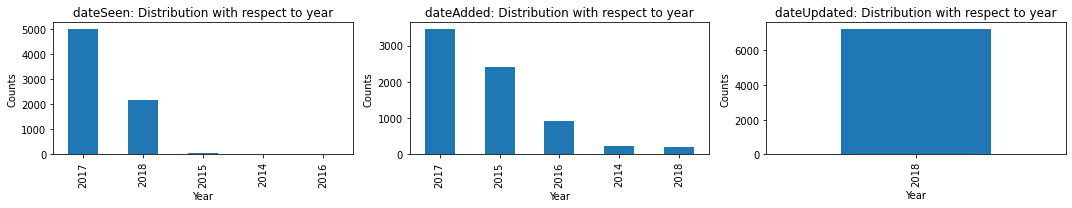

In [779]:
fig, axes = plt.subplots(1, 3, figsize = (15,3))
i = 0
for col in df.columns:
    if "_Year" in col:
        
        df[col].value_counts().plot(kind = "bar", ax = axes[i])
        axes[i].set_xlabel("Year")
        axes[i].set_ylabel("Counts")
        axes[i].set_title(col.replace("_Year", "") + ": Distribution with respect to year")
        i+=1

fig.tight_layout()
#fig.show()

Most products were Added and Seen in the year 2017 while all the products were Updated in 2018.

Similar plots can be generated for **Hour**, **Month** and **Day of Week** columns.

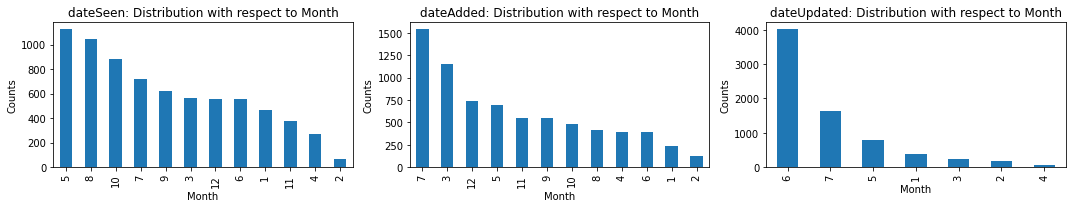

In [780]:
fig, axes = plt.subplots(1, 3, figsize = (15,3))
i = 0
for col in df.columns:
    if "_Month" in col:
        
        df[col].value_counts().plot(kind = "bar", ax = axes[i])
        axes[i].set_xlabel("Month")
        axes[i].set_ylabel("Counts")
        axes[i].set_title(col.replace("_Month", "") + ": Distribution with respect to Month")
        i+=1

fig.tight_layout()
#fig.show()

Looks like May, June and July are the months in which there is most activity.

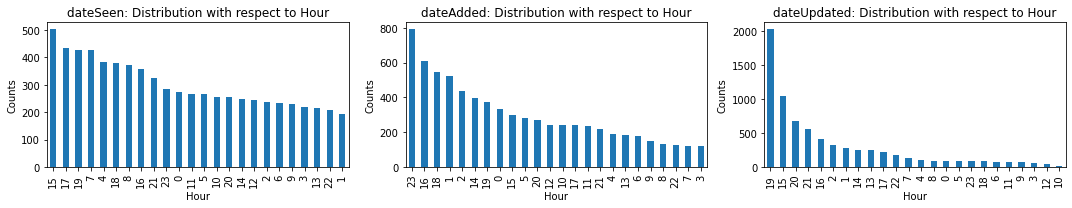

In [781]:
fig, axes = plt.subplots(1, 3, figsize = (15,3))
i = 0
for col in df.columns:
    if "_Hour" in col:
        
        df[col].value_counts().plot(kind = "bar", ax = axes[i])
        axes[i].set_xlabel("Hour")
        axes[i].set_ylabel("Counts")
        axes[i].set_title(col.replace("_Hour", "") + ": Distribution with respect to Hour")
        i+=1

fig.tight_layout()
#fig.show()

Most active hours are the evening hours.

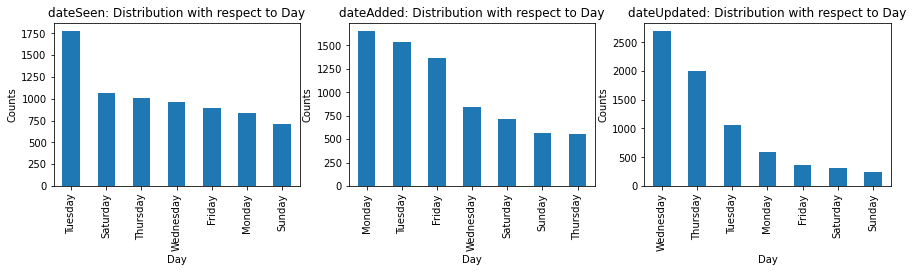

In [782]:
fig, axes = plt.subplots(1, 3, figsize = (15,3))
i = 0
for col in df.columns:
    if "_Day" in col:
        
        df[col].value_counts().plot(kind = "bar", ax = axes[i])
        axes[i].set_xlabel("Day")
        axes[i].set_ylabel("Counts")
        axes[i].set_title(col.replace("_Day", "") + ": Distribution with respect to Day")
        i+=1

#fig.tight_layout()
#fig.show()

Moving on to **isSale** column which represents if an item is on sale or not.

In [783]:
df.isSale.value_counts().to_frame()

,isSale
False,5506
True,1740


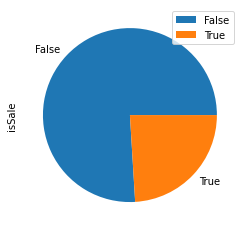

In [798]:
df.isSale.value_counts().to_frame().plot(kind = "pie", y = "isSale");

A little less than 25% items are on Sale.

Let's compare the summary statistics of items that are on sale with those not on sale.

In [808]:
stats = df.groupby("isSale")["amountMax"].mean().to_frame()
stats.columns = ["amountMax_Mean"]
stats1 = df.groupby("isSale")["amountMax"].median().to_frame()
stats1.columns = ["amountMax_Median"]
pd.concat([stats, stats1], axis = 1)

,amountMax_Mean,amountMax_Median
isSale,,
False,320.201196,131.593
True,576.184801,229.460


In [809]:
stats = df.groupby("isSale")["amountMin"].mean().to_frame()
stats.columns = ["amountMin_Mean"]
stats1 = df.groupby("isSale")["amountMin"].median().to_frame()
stats1.columns = ["amountMin_Median"]
pd.concat([stats, stats1], axis = 1)

,amountMin_Mean,amountMin_Median
isSale,,
False,320.201196,131.5930
True,474.591174,211.3573


The comparision suggests that the items which are on Sale have higher Prices.

Moving onto **merchant** and **brand** columns:

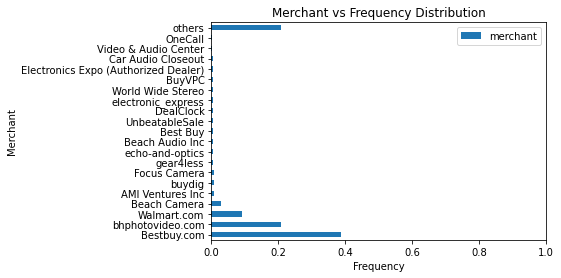

In [814]:
#Creating a list of top merchants. The merchants which are not in top 20 are categorised as others
df_top_merchants = (
    df["merchant"]
    .value_counts(normalize = True)
    .sort_values(ascending = False)
    .head(20)
)
df_top_merchants["others"] = 1 - df_top_merchants.sum()
df_top_merchants = df_top_merchants.to_frame()

#Plotting a horizontal Bar Graph
df_top_merchants.plot.barh(xlim = (0,1))
import matplotlib.pyplot as plt
plt.xlabel("Frequency")
plt.ylabel("Merchant")
plt.title("Merchant vs Frequency Distribution");

In [813]:
#Bottom 10 Merchants
print("Here is a datframe containing bottom 10 merchants :")
df_bottom_merchants = (
    df["merchant"]
    .value_counts(normalize = True)
    .sort_values(ascending = False)
    .tail(10)
    .to_frame()
)
df_bottom_merchants.columns = ["Proportion"]
df_bottom_merchants

Here is a datframe containing bottom 10 merchants :


,Proportion
Tunny LLC,0.000139
livinitandlovinitretail,0.000139
premium-electronics,0.000139
aftermathoutdoor336,0.000139
Widgetree,0.000139
monimorgan,0.000139
bargainbrokers,0.000139
hsum8885,0.000139
mcmech,0.000139
apc_sales,0.000139


Below is a wordcloud highlighting the most frequently listed brands.


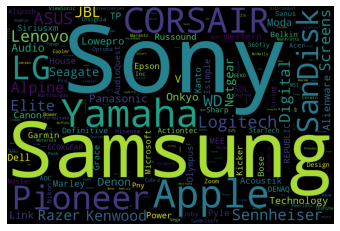

In [788]:
#Generating a wordcloud of brands
wordcloud = wc.WordCloud(width = 1500, height = 1000, collocations= False).generate(' '.join(df["brand"]))
plt.imshow(wordcloud)
plt.axis("off");


In [789]:
df.brand.value_counts().head(10)

Sony        785
Samsung     744
Apple       248
Yamaha      240
Pioneer     176
LG          175
Logitech    116
Lenovo      110
WD          108
CORSAIR     103
Name: brand, dtype: int64

The next column is **categories**.

In [790]:
df.categories.value_counts().head(2)

Computers,Internal Hard Drives,Network Attached Storage Drives etryvwsrbvvvvxfutbey,Internal Drives,Drives, Storage & Blank Media,Computers & Accessories,Networking,Hard Drives (HDD, SSD & NAS),Computer Accessories & Peripherals,Internal Hard Disk Drives,Electronics,Hard Drives & Storage,Drives Storage,Computers/Tablets & Networking,Computer Components,NAS Servers,Computers & Tablets,Network Attached Storage Drives,Data Storage    59
4K Ultra HD TVs,Samsung Smart TVs,Samsung Tax Time Savings,TV, Video & Home Audio,Electronics,Shop TVs by Type,Televisions,TVs Entertainment,TV & Home Theater,LED & LCD TVs,All TVs,Consumer Electronics,TVs,Refurbished TVs,TV & Video,Smart TVs by Brand,Television & Video,LED TVs                                                                                                                                                             53
Name: categories, dtype: int64

The categories values are too lengthy. We will store only the leading category (before the first comma) from each value and discard the rest.

In [791]:
df["category"] = df.categories.str.split(",", expand = True)[0]
df.drop(["categories"], axis = 1, inplace = True)
print("The top 5 categories are-")
df.category.value_counts().head()

The top 5 categories are-


Computers            1889
Electronics           665
Headphones            353
Stereos               300
TVs & Electronics     249
Name: category, dtype: int64

In [792]:
df.primaryCategories.value_counts()

Electronics              7193
 Apple CarPlay             27
 Intel Celeron             12
Electronics,Furniture       8
 Siri Eyes Free             6
Name: primaryCategories, dtype: int64

The data contains mostly electronics items.

The **shipping** column has too many null values. So, it is not explored.

Let's have a look at the **weight** column.

In [793]:
df.weight.head()

0    32.8 pounds
1      14 pounds
2      14 pounds
3      14 pounds
4      14 pounds
Name: weight, dtype: object

The weight should be a float instead of string. Also, upon further exploration, it was found that there are many other irregularities in the weight column, like, many values are missing but not null (in form of ""), many entries contain repeated weights like "1.8 1.8 1.8 .....". These issues are fixed below. A few rows having "" as weights are dropped.

In [794]:
#reformatting weight column (this column had many irregularities)
df.weight = df.weight.str[:4]
df.weight = df.weight.str.replace("[A-Za-z]" , "" ).replace(" ", "")
df.drop(df.loc[df.weight == ""].index, inplace = True)
df.weight = df.weight.astype(float)

/tmp/ipykernel_32865/2071795804.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df.weight = df.weight.str.replace("[A-Za-z]" , "" ).replace(" ", "")


In [817]:
df.weight.head()

0    32.8
1    14.0
2    14.0
3    14.0
4    14.0
Name: weight, dtype: float64

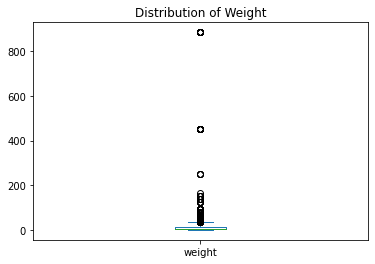

In [829]:
df.weight.plot(kind = "box", 
               title = "Distribution of Weight",
               labels = ["Pounds"]);

Clearly there are many outliers. We will try removing the top 10% itmes.

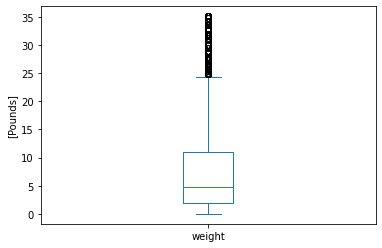

In [848]:
top = df.weight.quantile(0.9)
df[(df["weight"] < top) ]["weight"].plot(kind = "box", labels = ["count"])
plt.ylabel("[Pounds]");